In [1]:
# Import necessary libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import KNNImputer

# Load your data
df = pd.read_csv('historical_emissions.csv')

# Data Understanding
print(df.head())
print(df.info())
print(df.describe())

# Data Cleaning
# Remove irrelevant columns
cols_to_drop = ['ISO', 'Country', 'Data source', 'Sector', 'Gas', 'Unit', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991']
df = df.drop(cols_to_drop, axis=1)

# Data Preprocessing
# Convert categorical data to numerical data (one-hot encoding)
df = pd.get_dummies(df)

# Fill missing values
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

# Normalize the data
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

   ISO               Country    Data source                Sector      Gas  \
0  AFG           Afghanistan  Climate Watch  Total including LUCF  All GHG   
1  AGO                Angola  Climate Watch  Total including LUCF  All GHG   
2  ALB               Albania  Climate Watch  Total including LUCF  All GHG   
3  AND               Andorra  Climate Watch  Total including LUCF  All GHG   
4  ARE  United Arab Emirates  Climate Watch  Total including LUCF  All GHG   

     Unit    2020    2019    2018    2017  ...    1999    1998    1997  \
0  MtCO₂e   31.27   32.89   32.74   31.91  ...   13.59   12.68   11.83   
1  MtCO₂e  119.41  129.96  122.18  136.10  ...   87.80   90.24   80.81   
2  MtCO₂e    8.06    8.95    9.43    9.68  ...    8.03    6.82    6.59   
3  MtCO₂e    0.58    0.61    0.62    0.59  ...    0.57    0.54    0.51   
4  MtCO₂e  249.93  248.67  234.35  251.24  ...  114.11  112.80  110.65   

     1996    1995   1994   1993   1992   1991   1990  
0   10.84    9.79   9.34   9.29

In [2]:
import pandas as pd

# Step 1: Load the CSV file
data = pd.read_csv('historical_emissions.csv')

# Step 2: Remove unnecessary columns
columns_to_remove = ['Data source', 'Sector', 'Gas', 'Unit']
data = data.drop(columns_to_remove, axis=1)

# Step 3: Handle missing values
data = data.dropna()  # Remove rows with missing values
data = data.fillna(value=0)  # Fill missing values with 0

# Step 4: Rename columns
column_names = {
    'ISO': 'Country Code',
    'MtCO₂e': 'Emissions (MtCO₂e)'
}
data = data.rename(columns=column_names)

# Step 5: Reshape the data
id_vars = ['Country Code', 'Country']
value_vars = data.columns[2:]  # Assuming the year columns start from index 2
data = data.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Emissions')

# Step 6: Sort the data
data = data.sort_values(by=['Country Code', 'Year'])

# Step 7: Save the cleaned data
data.to_csv('cleaned_emissions.csv', index=False)

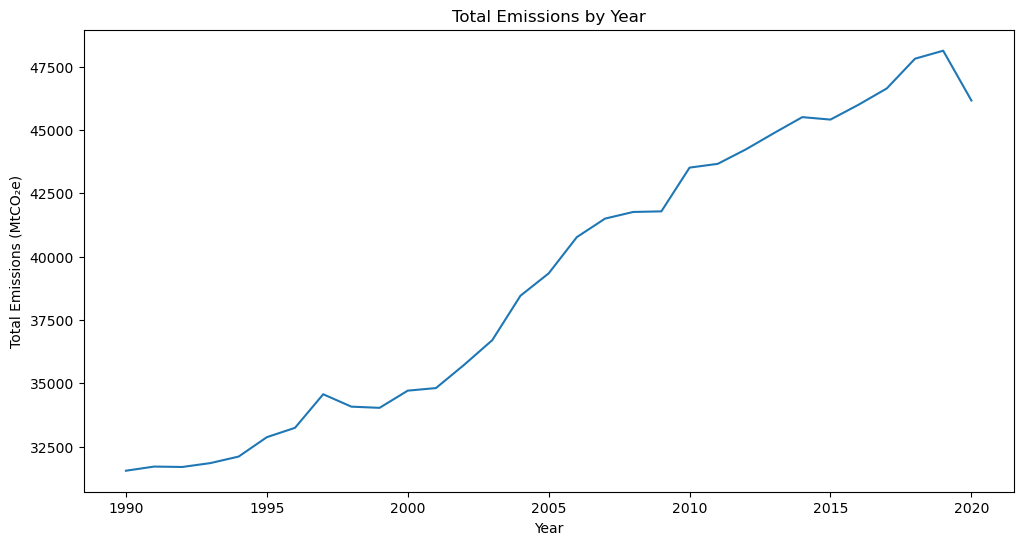

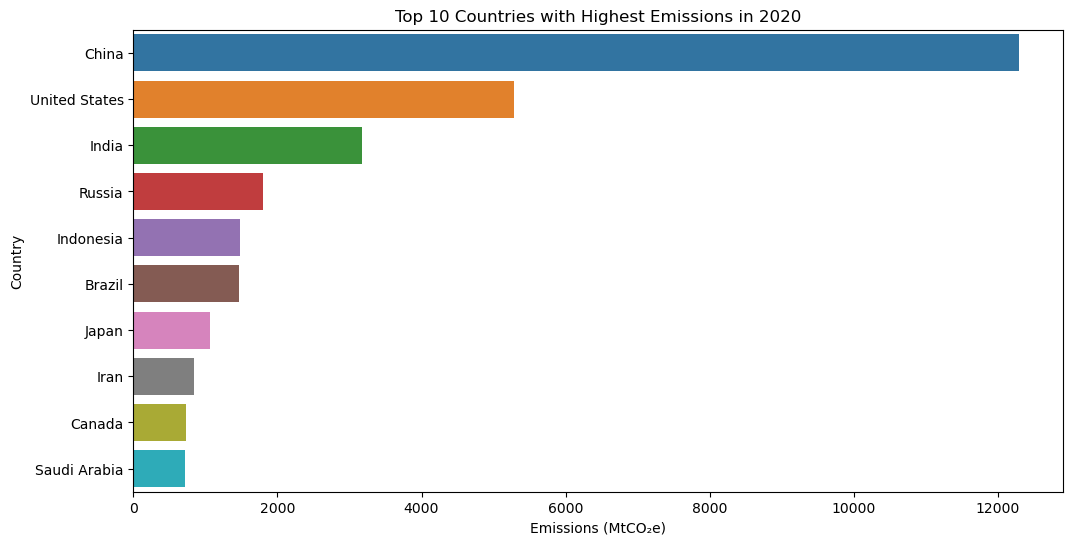

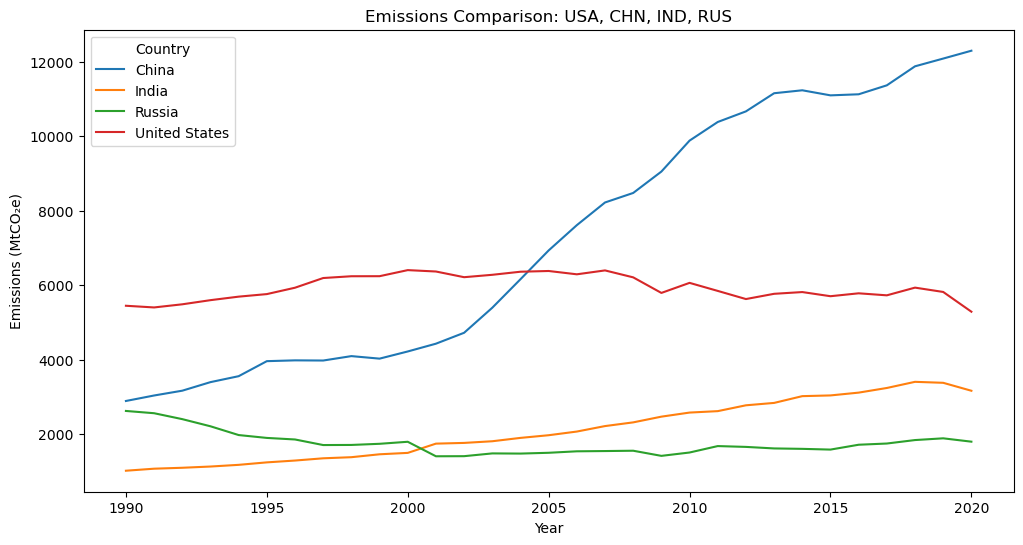

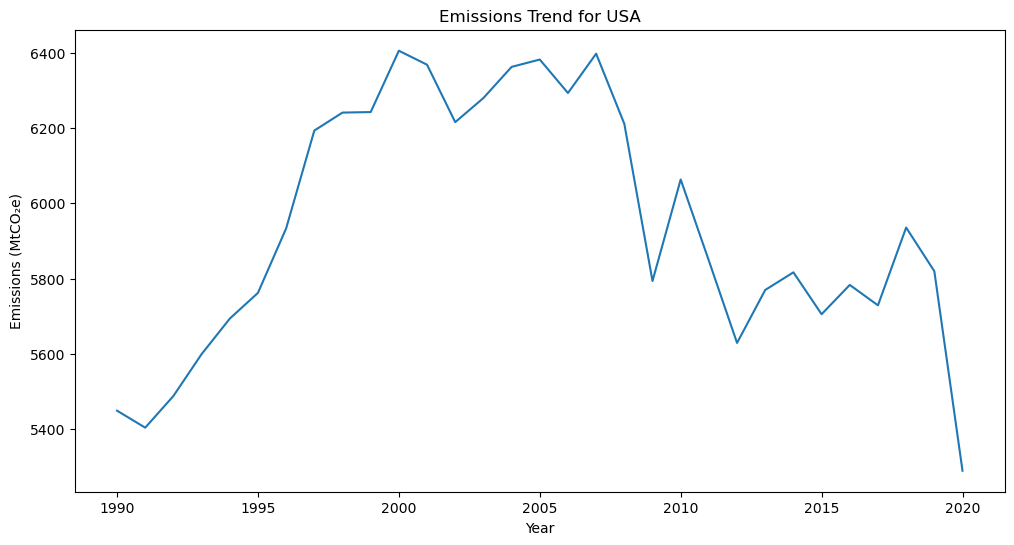

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('cleaned_emissions.csv')

# Perform data analysis and visualization
filtered_data = data[data['Country'] != 'World']
total_emissions_by_year = filtered_data.groupby('Year')['Emissions'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=total_emissions_by_year.index, y=total_emissions_by_year.values)
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO₂e)')
plt.show()


# 2. Top 10 countries with the highest emissions in the latest year
latest_year = data['Year'].max()
top_10_emitting_countries = data[(data['Year'] == latest_year) & (data['Country'] != 'World')].nlargest(10, 'Emissions')

plt.figure(figsize=(12, 6))
sns.barplot(x='Emissions', y='Country', data=top_10_emitting_countries)
plt.title(f'Top 10 Countries with Highest Emissions in {latest_year}')
plt.xlabel('Emissions (MtCO₂e)')
plt.ylabel('Country')
plt.show()

# 3. Emissions comparison between selected countries over the years
selected_countries = ['USA', 'CHN', 'IND', 'RUS']  # Modify with desired countries
selected_data = data[data['Country Code'].isin(selected_countries)]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Emissions', hue='Country', data=selected_data)
plt.title('Emissions Comparison: USA, CHN, IND, RUS')
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.legend(title='Country')
plt.show()

# 4. Emissions trend for a specific country
country_to_analyze = 'USA'  # Modify with desired country
country_data = data[data['Country Code'] == country_to_analyze]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Emissions', data=country_data)
plt.title(f'Emissions Trend for {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Emissions (MtCO₂e)')
plt.show()

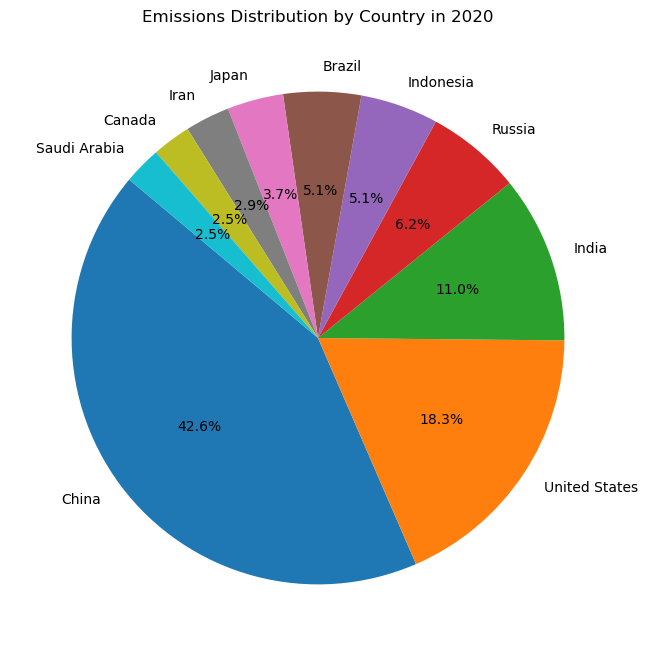

In [4]:
#5. Emissions distribution by country in a specific year (Pie Chart)
year_to_analyze = 2020  # Modify with desired year
top_countries = data[(data['Year'] == year_to_analyze) & (data['Country'] != 'World')].nlargest(10, 'Emissions')

# Calculate the percentage of emissions for each country
total_emissions = top_countries['Emissions'].sum()
top_countries['Percentage'] = (top_countries['Emissions'] / total_emissions) * 100

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_countries['Percentage'], labels=top_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title(f'Emissions Distribution by Country in {year_to_analyze}')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for the model
data['Year'] = data['Year'].astype(int)
X = data[data['Country Code'] == 'WORLD'][['Year']]  # Modify with desired country
y = data[data['Country Code'] == 'WORLD']['Emissions']  # Modify with desired country

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the feature names
feature_names = X.columns.tolist()

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Predict future emissions
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)  # Modify with desired years
future_emissions = model.predict(future_years)

print(f'Predicted Emissions for Future Years: {future_emissions}')

Mean Squared Error: 812156.2221277481
R2 Score: 0.9732311369500098
Predicted Emissions for Future Years: [52544.62932653 53174.84123433 53805.05314214 54435.26504994
 55065.47695774 55695.68886554 56325.90077334]


/Users/tyngen/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


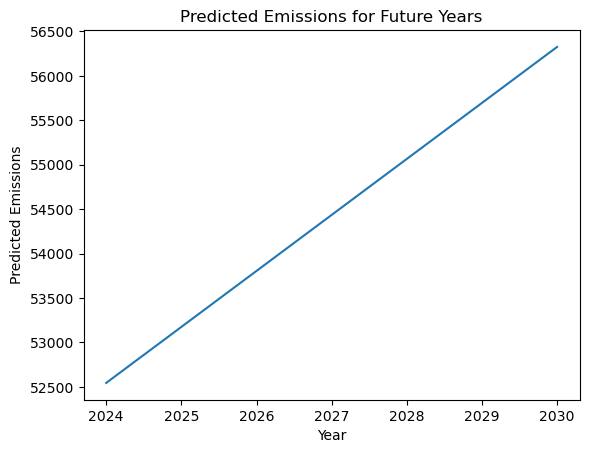

In [15]:
import matplotlib.pyplot as plt

# Assuming future_years and future_emissions are your data
plt.plot(future_years, future_emissions)
plt.xlabel('Year')
plt.ylabel('Predicted Emissions')
plt.title('Predicted Emissions for Future Years')
plt.show()
